# Visualizing Health Risk

The press often get it wrong when comminucating data particularly when it comes to health risks
A sensational headline 'X Gives You Cancer' is hard to resist, perhaps 

In [11]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

- there is a 6% chance of contracting bowel cancer in a population
- eating 50g of processed meat daily increases the chance by 18%

Create a dataframe represesenting a group of 100 people, 
those that will not get cancer, those that will get it by chance and
those that will get through eating a lot of processed meat

In [12]:
data = pd.DataFrame()
pop = 100                   # total population
chance = 6                  # number who get cancer by chance
bacon = int(6 * 0.18)       # number who get cancer by eating bacon
none = pop - chance - bacon # number who won't get cancer 

data['Non-sufferer'] = [none]
data['Sufferer by Chance'] = [chance]
data['Bacon Eater'] = [bacon]

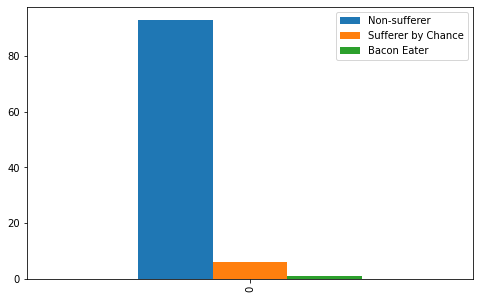

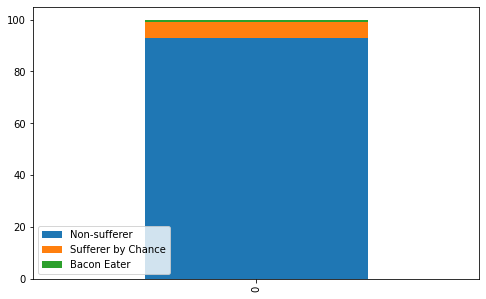

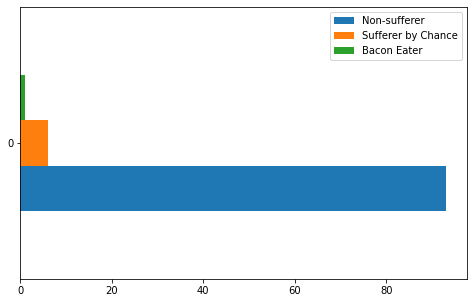

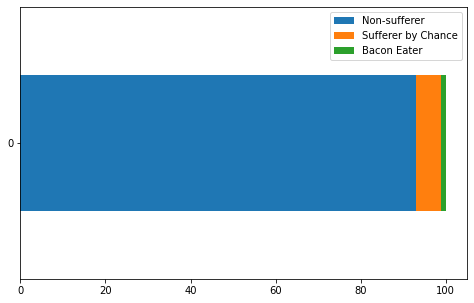

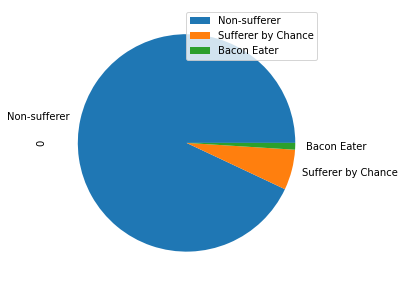

In [13]:
# Draw various bar charts
data.plot.bar(figsize=(8,5))
data.plot.bar(stacked=True,figsize=(8,5))

data.plot.barh(figsize=(8,5))
data.plot.barh(stacked=True,figsize=(8,5))

# and a pie chart
data.T.plot.pie(subplots=True,figsize=(8,5))

pass;


Try a heatmap
first create an array of pop where 
- 0 is a person without cancer
- 1 is a person who got it by chance
- 2 is a person who got it from eating too much bacon

In [14]:
# Arrays of the different cases
a1 = [0]*data['Non-sufferer'].values[0]
a2 = [1]*data['Sufferer by Chance'].values[0]
a3 = [2]*data['Bacon Eater'].values[0]

# Stitch them together
a1.extend(a2)
a1.extend(a3)

In [15]:
# Create a grid from the array
b = np.array(a1).reshape((10,10))

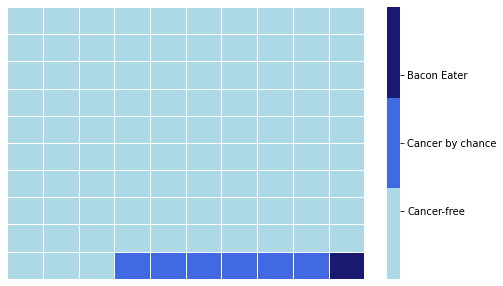

In [16]:
# Plot the grid as a heat map in Seaborn
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(b, 
            linewidths=0.5, 
            yticklabels=False,
            xticklabels=False, 
            cmap=['lightblue','royalblue','midnightblue']
)

# Customize legend
colorbar = ax.collections[0].colorbar 
colorbar.set_ticks([0.5,1,1.5])
colorbar.set_ticklabels(['Cancer-free','Cancer by chance','Bacon Eater'])



pass;

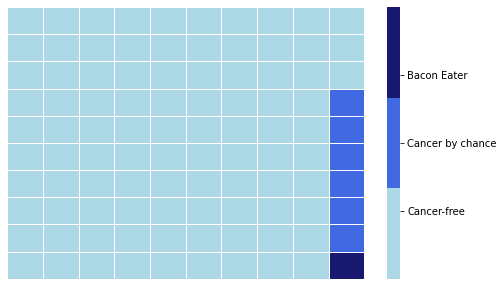

In [17]:
# Plot the grid as a heat map in Seaborn
# other way round
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(b.T, 
            linewidths=0.5, 
            yticklabels=False,
            xticklabels=False,
            cmap=['lightblue','royalblue','midnightblue']
            )

# Customize legend
colorbar = ax.collections[0].colorbar 
colorbar.set_ticks([0.5,1,1.5])
colorbar.set_ticklabels(['Cancer-free','Cancer by chance','Bacon Eater'])

pass;

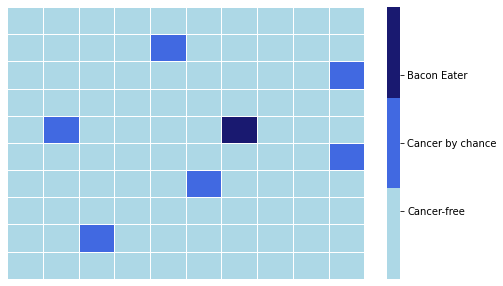

In [18]:
# Shuffle the data and redraw

random.shuffle(a1)
b2 = np.array(a1).reshape((10,10))
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(b2, 
            linewidths=0.5, 
            yticklabels=False,
            xticklabels=False,
            cmap=['lightblue','royalblue','midnightblue']
            )

# Customize legend
colorbar = ax.collections[0].colorbar 
colorbar.set_ticks([0.5,1,1.5])
colorbar.set_ticklabels(['Cancer-free','Cancer by chance','Bacon Eater'])


pass;

In [27]:
%%HTML
<i class="bi-person-fill" style="font-size: 4rem;"></i>'


In [25]:
# Use icons to represent people and draw them in an HTML table

from IPython import display

# Create three icons of different colours
personOrange = '<i class="bi-person-fill" style="font-size: 1rem; color: orange;"></i>'
personRed = '<i class="bi-person-fill" style="font-size: 1rem; color: red;"></i>'
personGrey = '<i class="bi-person-fill" style="font-size: 1rem; color: grey;"></i>'

# The first part of the HTML

head = """
<link rel="stylesheet" 
      href="https://cdn.jsdelivr.net/npm/bootstrap-icons@1.3.0/font/bootstrap-icons.css">

<div">
"""

# The last part of the HTML
tail = "</div>"

# The middle
rows=""
for r in range(0,b2.shape[1]):
    rows = rows + "<tr style='background-color:#f0f0f0'>"
    td = ""
    for c in range(0,b2.shape[0]):
        icon = personGrey
        if b2[c][r] == 1:
            icon = personOrange
        elif b2[c][r] == 2:
            icon = personRed
        td = td + f"<td>{icon}</td>"
    rows = rows + td + "</tr>" 

legend = f"""
    <div style="display:inline-block;padding:10px">
    {personRed} Bacon Eater with cancer<br/> 
    {personOrange} Cancer by chance <br/>
    {personGrey} Cancer free
    </div>
"""

table = "<table style='display:inline-block'>"+rows+"</table>"

table = head + table + legend + tail

display.HTML(table)


,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
